In [1]:
from pathlib import Path

from astropy.io import fits
from astropy.visualization import ZScaleInterval

import cv2
import numpy as np
import seaborn as sns
from numpy.typing import NDArray
import matplotlib.pyplot as plt

In [2]:
def fits_to_norm(path_to_fith: Path,) -> NDArray:
    fits_data = fits.getdata(path_to_fith)
    fits_data = np.nan_to_num(fits_data, nan=0.0, posinf=0.0, neginf=0.0) # type: ignore
    zscale = ZScaleInterval()
    vmin, vmax = zscale.get_limits(fits_data)
    data_norm = np.clip((fits_data - vmin) / (vmax - vmin), 0, 1)
    return data_norm


img = fits_to_norm("/home/zorinep/project/data/fits/rgb/aia.lev1_euv_12s.2025-07-24T000006Z.193.image_lev1.fits")

In [3]:
img.shape

(4096, 4096)

In [4]:
img.min(), img.max()

(np.float64(0.0), np.float64(1.0))

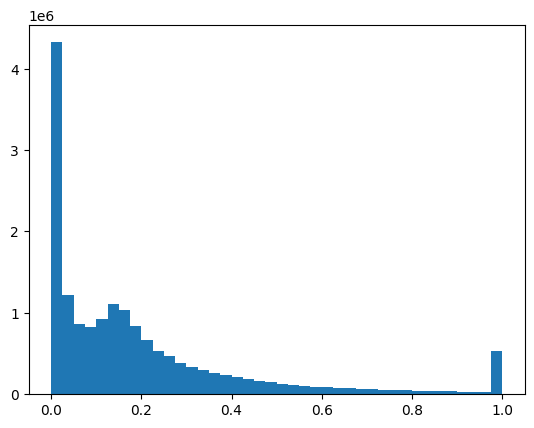

In [5]:
plt.hist(img.ravel(), bins=40)
plt.show()

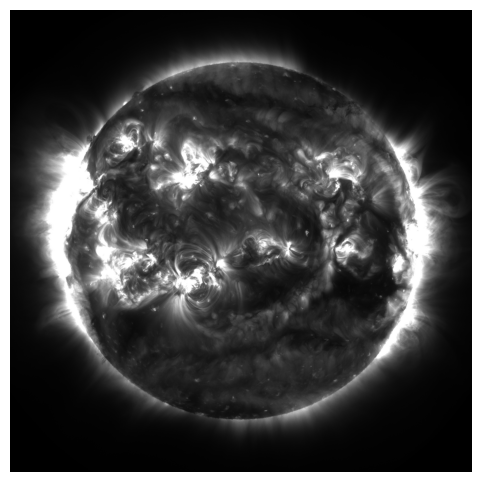

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [7]:
r = fits_to_norm("../data/fits/rgb/aia.lev1_euv_12s.2025-07-24T000010Z.171.image_lev1.fits")
g = fits_to_norm("../data/fits/rgb/aia.lev1_euv_12s.2025-07-24T000006Z.193.image_lev1.fits")
b = fits_to_norm("../data/fits/rgb/aia.lev1_euv_12s.2025-07-23T235959Z.211.image_lev1.fits")

norm_img = np.dstack([r, g, b])

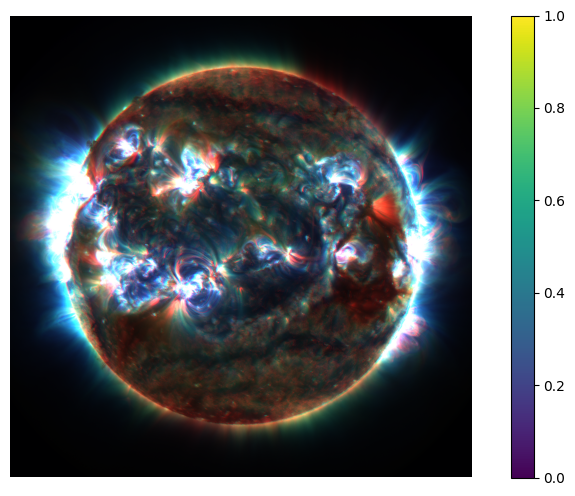

In [8]:
plt.figure(figsize=(10, 6))
plt.imshow(norm_img)
plt.axis("off")
plt.colorbar()
plt.show()